## Step 1.a Projecting demographic variables

In [1]:
import datetime; print(datetime.datetime.now())

2017-11-20 14:27:52.824064


**Notebook Abstract:**

This notebook shows an example on how to prepare projected aggregated benchmarks, as well as how to introduce **bias** (a proxy for simulating development scenarios at an aggregated level) to the benchmarks.

This step is not a requirement for running the simulation, the data containing projections at an aggregated level are a **requirement** for running the simulation.

A spatial model requires projected aggregated values for each simulation area. Depending on the simulation model the estimation of such values might be difficult.

### Aggregated census data

In [5]:
import pandas as pd
from urbanmetabolism._scripts.aggregates import print_all

In [6]:
census = pd.read_csv('data/benchmarks_projected.csv', index_col=0)
skip = ['pop', 'Income', 'Water', 'Electricity']

We read a csv file containing the projected data with help of pandas. The `print_all` function is used to print the aggregated data.

A list of strings is constructed to tell the function which columns to ignore during plotting.

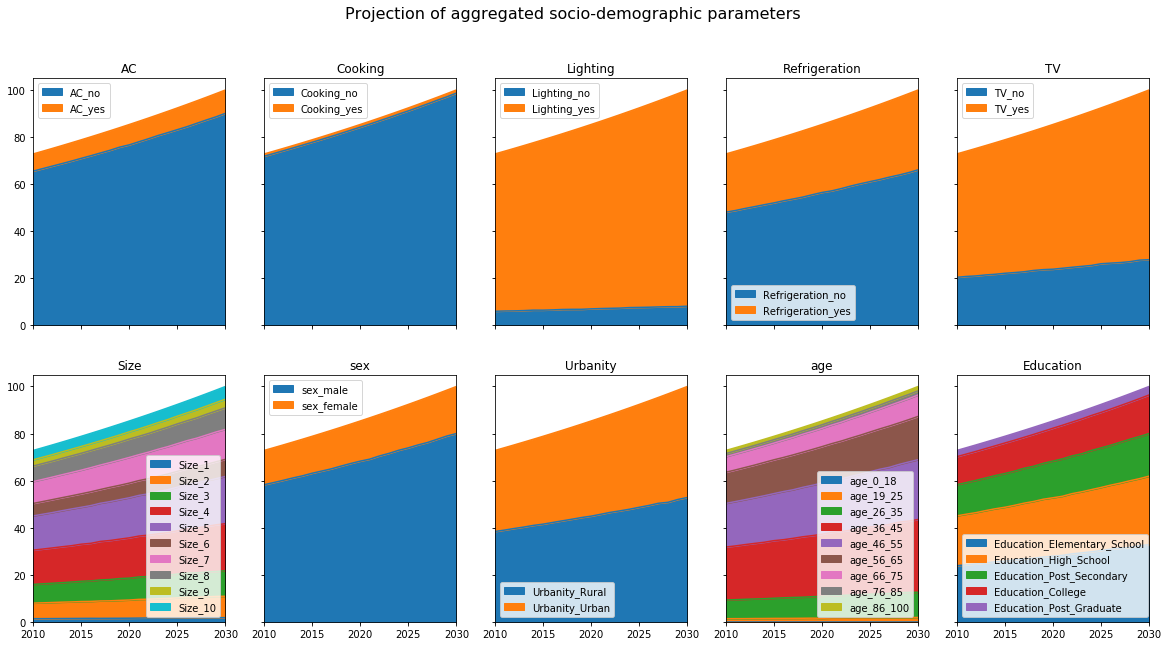

In [10]:
_ = print_all(
    census, 'year',
    skip = skip,
    total_pop = census.loc[:, 'pop'],
    title="Projection of aggregated socio-demographic parameters"
          )

We pass the following variables to the `print_all` function:

1. A pandas DataFrame containing the projected aggregated data.
2. A string defining the sufix used to save the file on disk.
3. `var =` defines the type of plot to use.
4. `skip =` defines the list of columns to skip in the plot.
5. `total_pop =` defines a column to use for data normalization.
6. `title =` defines the plot title.

### Introduce bias to census data

The manipulations are expressed as **growth factors**. This factors increase the share (>1) or decrease the share (<1) of specific categories. In addition we can define gradual changes on these growth factors. If no starting point is given the function assumes initial simulation year.

The define growth rates are passed as a python dictionary to the function (`{‘key’=value}`). Where `key` is the variable category to be modified and `value` is either a single number (assumed initial year to be initial simulation year) or a dictionary attributing a growth rate to sequential steps.

In [5]:
bias_to = {
    'AC_yes': 1.17,
    'Cooking_yes': {2010: 1.01, 2020: 1.5},
    'Lighting_yes': 1.005,
    'Refrigeration_yes': 1.1,
    'TV_yes': 1.05,
    'Size_1': 1.05,
    'Size_2': 1.07,
    'Size_3': 1.07,
    'Size_4': 0.93,
    'Size_5': 0.92,
    'Size_6': 0.92,
    'Size_7': 0.92,
    'Size_8': 0.90,
    'Size_9': 0.88,
    'Size_10': 0.80,
    'sex_female':1.02,
    'Urbanity_Urban': 1.03,
    'age_26_35':1.03,
    'age_36_45':1.03,
    'age_46_55':1.03,
    'Education_Post_Secondary':1.05,
    'Education_College':1.04,
    'Education_Post_Graduate':1.03
}

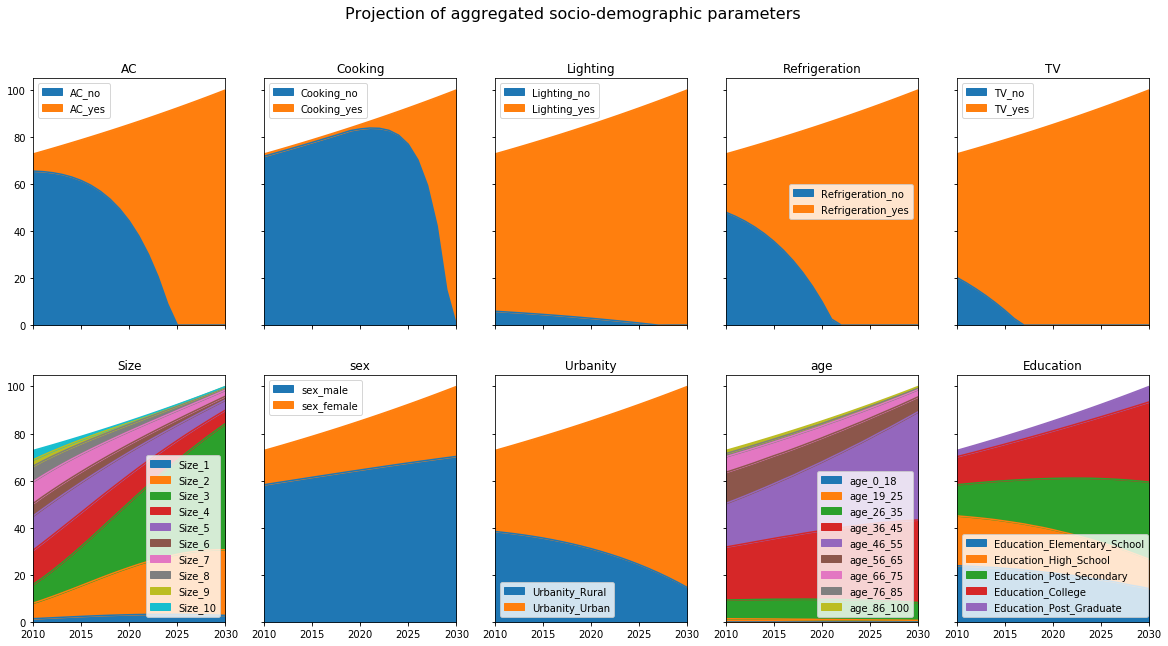

In [6]:
_ = print_all(
    census, 'year_bias',
    skip = skip,
    bias = bias_to,
    total_pop = census.loc[:, 'pop'],
    title="Projection of aggregated socio-demographic parameters",
    save_data = 'data/benchmarks_year_bias.csv'
          )